# Clustering de documents

## Imports

In [13]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [14]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\janvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
data_path = "../data/camille_crise_economique_des_annees_1930/"

## Choisir une décennie

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [16]:
files = [f for f in sorted(os.listdir(data_path))]

In [17]:
# Exemple de fichiers
files[:5]

['KB_JB1051_1930-03-22_01-00003.txt',
 'KB_JB1051_1930-03-29_01-00003.txt',
 'KB_JB1051_1930-04-05_01-00001.txt',
 'KB_JB1051_1930-04-26_01-00002.txt',
 'KB_JB1051_1930-04-26_01-00004.txt']

In [18]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [19]:
# Exemple de textes
texts[0][:400]

'Samedi 22 Mars 1930. « LE DRAPEAU ROUGE » u Flèches Rouges u Les faits internationaux de la semaine Les lauriers de M. Sinzot empêchent M. Branquart de dormir. M. Sinzot est, évidemment, un homme « de stoc ». // sait rugir, mugir à lui seul, mieux que toute une ménagerie. fl a employé ses talents, à la Chambre, pour, dénoncer les communistes en général ct notre camarade, [acquemottè, en particulie'

## Vectoriser les documents à l'aide de TF-IDF

In [20]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [21]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [22]:
tfidf_vectors = vectorizer.fit_transform(texts)

In [23]:
# Détail de la matrice
tfidf_vectors

<1000x3597 sparse matrix of type '<class 'numpy.float64'>'
	with 740131 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [24]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

dc             0.260055
capitaliste    0.215652
masses         0.201594
fasciste       0.191395
commune        0.180758
                 ...   
examine        0.000000
examiner       0.000000
examiné        0.000000
excellent      0.000000
♦              0.000000
Length: 3597, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [25]:
cosine([1, 2, 3], [1, 2, 3])

0

In [26]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [27]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [28]:
tfidf_array = tfidf_vectors.toarray()

In [29]:
# Vecteur du document 0
tfidf_array[0]

array([0.       , 0.       , 0.       , ..., 0.0203774, 0.       ,
       0.       ])

In [30]:
# Vecteur du document 1
tfidf_array[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
cosine(tfidf_array[0], tfidf_array[1])

0.595036374796474

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [32]:
N_CLUSTERS = 3

### Instancier le modèle K-Means et ses arguments

In [33]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [34]:
clusters = km_model.fit_predict(tfidf_vectors)

In [35]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [36]:
pprint(dict(clustering))

{0: ['KB_JB421_1930-05-11_01-00004.txt',
     'KB_JB427_1930-08-31_01-00008.txt',
     'KB_JB427_1930-11-16_01-00006.txt',
     'KB_JB427_1930-12-28_01-00006.txt',
     'KB_JB427_1931-01-25_01-00006.txt',
     'KB_JB427_1931-02-01_01-00006.txt',
     'KB_JB427_1931-03-01_01-00006.txt',
     'KB_JB427_1931-06-21_01-00008.txt',
     'KB_JB427_1931-07-26_01-00007.txt',
     'KB_JB427_1931-09-13_01-00007.txt',
     'KB_JB427_1932-01-24_01-00007.txt',
     'KB_JB427_1932-02-07_01-00007.txt',
     'KB_JB427_1932-04-24_01-00006.txt',
     'KB_JB427_1932-06-19_01-00006.txt',
     'KB_JB555_1931-04-26_01-00004.txt',
     'KB_JB555_1931-07-01_01-00007.txt',
     'KB_JB572_1931-03-29_01-00008.txt',
     'KB_JB572_1932-03-28_01-00005.txt',
     'KB_JB638_1930-06-21_01-00017.txt',
     'KB_JB638_1930-12-13_01-00015.txt',
     'KB_JB638_1931-01-03_01-00013.txt',
     'KB_JB638_1931-05-29_01-00007.txt',
     'KB_JB638_1931-09-26_01-00015.txt',
     'KB_JB638_1932-01-09_01-00016.txt',
     'KB_JB729_1

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [37]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [38]:
reduced_vectors[:10]

array([[-0.16088986, -0.14297138],
       [-0.15759256, -0.18728764],
       [-0.15775683, -0.142832  ],
       [-0.13906894, -0.18529206],
       [-0.12326632, -0.12998489],
       [-0.14910146, -0.12956207],
       [-0.14801494, -0.19187826],
       [-0.13604648, -0.16554427],
       [-0.14155972, -0.20907667],
       [-0.15595588,  0.01123925]])

### Générer le plot

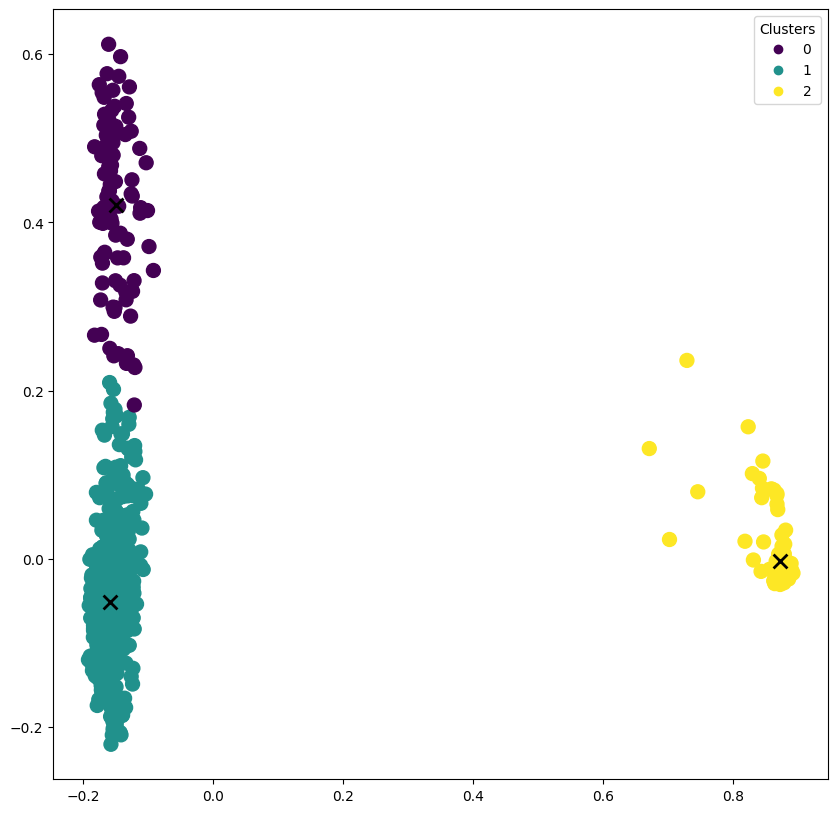

In [39]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")